### Load Libraries

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

from wordcloud import WordCloud

In [9]:
# Check available styles
print("Available styles:", plt.style.available)

Available styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
# Set the style of plots
plt.style.use('seaborn-muted')  # Set a specific style from predefined styles

# Define custom font settings
font = {'family' : 'DejaVu Sans',  # Font family, e.g., 'serif', 'sans-serif'
        'weight' : 'bold',         # Font weight, e.g., 'bold', 'normal'
        'size'   : 12}             # Font size

# Apply font settings
plt.rc('font', **font)

### Load dataset

In [12]:
# Load the data
df = pd.read_csv('DBLP_citation.csv')

# View the data
df.head()

,title,authors,year,venue,id,references,abstract,citation_count
0,OQL[C++]: Extending C++ with an Object Query C...,['José A. Blakeley'],1995,Modern Database Systems,0,[],NaN,5
1,Transaction Management in Multidatabase Systems.,"['Yuri Breitbart', 'Hector Garcia-Molina', 'Ab...",1995,Modern Database Systems,1,[],NaN,0
2,Overview of the ADDS System.,"['Yuri Breitbart', 'Tom C. Reyes']",1995,Modern Database Systems,2,[],NaN,0
3,Multimedia Information Systems: Issues and App...,"['Stavros Christodoulakis', 'Leonidas Koveos']",1995,Modern Database Systems,3,[],NaN,2
4,Active Database Systems.,"['Umeshwar Dayal', 'Eric N. Hanson', 'Jennifer...",1995,Modern Database Systems,4,['995520'],NaN,16


## 1. Basic information about the dataset

In [13]:
# Shape
df.shape

(1632442, 8)

In [14]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632442 entries, 0 to 1632441
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   title           1632442 non-null  object
 1   authors         1632442 non-null  object
 2   year            1632442 non-null  int64 
 3   venue           1630753 non-null  object
 4   id              1632442 non-null  int64 
 5   references      1632442 non-null  object
 6   abstract        653506 non-null   object
 7   citation_count  1632442 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 99.6+ MB


In [15]:
# Describe the data
df.describe()

,year,id,citation_count
count,1.632442e+06,1.632442e+06,1.632442e+06
mean,1.801409e+03,8.162205e+05,1.425747e+00
std,6.012202e+02,4.712456e+05,1.048333e+01
min,-1.000000e+00,0.000000e+00,0.000000e+00
25%,1.995000e+03,4.081102e+05,0.000000e+00
50%,2.003000e+03,8.162205e+05,0.000000e+00
75%,2.007000e+03,1.224331e+06,0.000000e+00
max,2.011000e+03,1.632441e+06,4.474000e+03


## 2. Duplicate values

In [16]:
# Find the duplicates
df.duplicated().sum()

0

## 3. Know the datatypes

In [17]:
# Datatypes
df.dtypes

title             object
authors           object
year               int64
venue             object
id                 int64
references        object
abstract          object
citation_count     int64
dtype: object

## 4. Find the Null values

In [18]:
# Find null values
df.isnull().sum()

title                  0
authors                0
year                   0
venue               1689
id                     0
references             0
abstract          978936
citation_count         0
dtype: int64

## 5. Exploratory Data Analysis (EDA)

### 5.1 Unique values in each column

In [19]:
# Total number of rows in the dataset
total_rows = len(df)
print(f"There are a total of {total_rows} rows in the dataset.")

# Calculating and printing the unique values count and percentage for each column
for column in df.columns:
    unique_count = df[column].nunique()
    percentage = (unique_count / total_rows) * 100  # Calculate the percentage of unique values
    print(f"Column {column} has {unique_count} unique values, which is {percentage:.2f}% of the total.")

There are a total of 1632442 rows in the dataset.


Column title has 1603136 unique values, which is 98.20% of the total.
Column authors has 1148046 unique values, which is 70.33% of the total.
Column year has 77 unique values, which is 0.00% of the total.
Column venue has 7707 unique values, which is 0.47% of the total.
Column id has 1632442 unique values, which is 100.00% of the total.
Column references has 298132 unique values, which is 18.26% of the total.
Column abstract has 642158 unique values, which is 39.34% of the total.
Column citation_count has 452 unique values, which is 0.03% of the total.


#### 5.1.1 Remove unnecessary column(s)

<div style="background-color: blue; color: white; padding: 10px;">
    Decision to remove unnecessary column 'id': The column is unique to each observation in the dataset, and is not contributing to our analysis.
</div>

In [20]:
#Remove id column
df.drop('id', axis=1, inplace=True)
df.tail()

,title,authors,year,venue,references,abstract,citation_count
1632437,The Structure and Properties of Color Spaces a...,['Eric Dubois'],2009,The Structure and Properties of Color Spaces a...,[],NaN,0
1632438,Tremor: From Pathogenesis to Treatment,"['Giuliana Grimaldi', 'Mario Manto']",2008,Tremor: From Pathogenesis to Treatment,[],NaN,0
1632439,Quantitative Neurophysiology,['Joseph V. Tranquillo'],2008,Quantitative Neurophysiology,[],NaN,0
1632440,Access Control in Data Management Systems,['Elena Ferrari'],2010,Access Control in Data Management Systems,[],Access control is one of the fundamental servi...,0
1632441,Lung Sounds: An Advanced Signal Processing Per...,['Leontios J. Hadjileontiadis'],2008,Lung Sounds,[],NaN,0


### 5.2 Authors

In [21]:
# Unique values in authors column
df['authors'].value_counts().sort_values(ascending=False)

['']                                                                          18242
['Diane Crawford']                                                              250
['Irith Pomeranz', 'Sudhakar M. Reddy']                                         241
['Robert L. Glass']                                                             228
['Bill Hancock']                                                                185
                                                                              ...  
["Gabriele Dell'Amico", 'Eleonora Guerrini', 'Raffaele Riva']                     1
['Qingjiang Shi', 'Chen He', 'Hongyang Chen', 'Ling-ge Jiang', 'Wei Wang']        1
['Andre Lei', 'Robert Schober']                                                   1
['Chengqun Wang', 'Jiming Chen', 'Youxian Sun', 'Xuemin Shen']                    1
['Leontios J. Hadjileontiadis']                                                   1
Name: authors, Length: 1148046, dtype: int64

<div style="background-color: blue; color: white; padding: 10px;">
    Decision to remove missing author values
</div>

In [22]:
# Filter out rows where year is not -1
author_df = df[df['authors'] != '']
author_df.shape[0]

1632442

### 5.3 Year

In [23]:
# Unique values in year columm
author_df['year'].value_counts().sort_index()

-1       163427
 1936        12
 1937        15
 1938        10
 1939        18
          ...  
 2007    133397
 2008    143498
 2009    142226
 2010     60914
 2011       313
Name: year, Length: 77, dtype: int64

<div style="background-color: blue; color: white; padding: 10px;">
    Decision to remove missing year values
</div>

In [24]:
# Filter out rows where year is not -1
non_zero_year = author_df[author_df['year'] != -1]

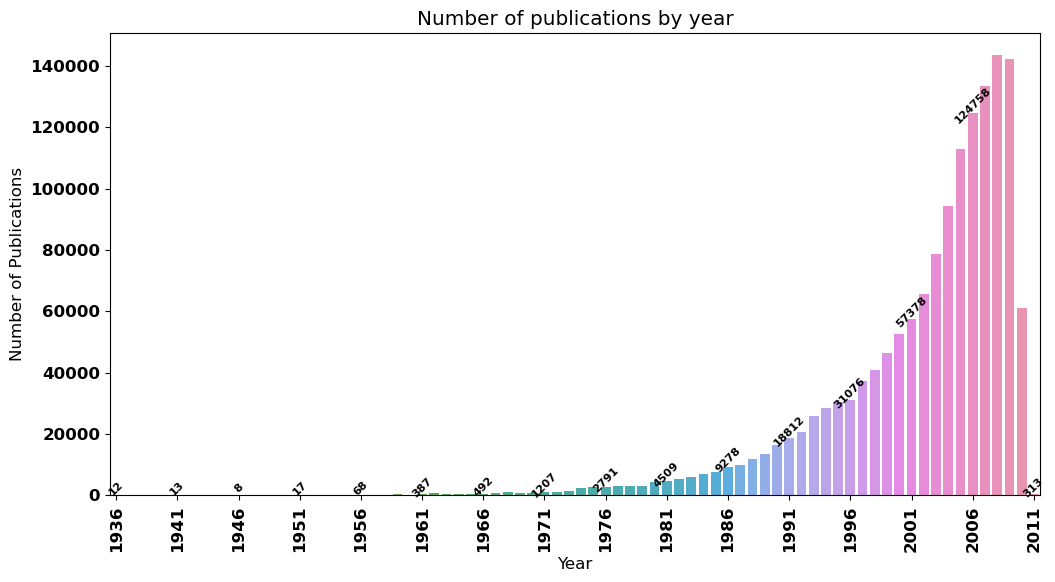

In [25]:
# Plotting the number of publications by year
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='year', data=non_zero_year)
plt.title('Number of publications by year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')

# Generate x-ticks for every 5 years
years = non_zero_year['year'].unique()
years.sort()  # Make sure years are sorted
tick_positions = np.arange(0, len(years), 5)  # Position every 10 years based on sorted order
tick_labels = [years[i] for i in tick_positions]  # Get the year labels for these positions

# Setting x-ticks to show every 5 years
plt.xticks(tick_positions, tick_labels, rotation=90)  # Apply both position and label changes in one call

# Adding data labels on top of each bar with smaller font and tilted, but only for every 10 years
labeled_years = set(tick_labels)  # Set of years to label
for p in ax.patches:
    year = int(p.get_x() + 0.5)  # Approximate year index by the bar's x position
    if years[year] in labeled_years:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=8, color='black', 
                    xytext=(0, 5), textcoords='offset points', rotation=45)

plt.show()


In [26]:
# Percentage of publications between years 1980 to 2011 are how much % of total
publications_1980_2011 = non_zero_year[(non_zero_year['year'] >= 1980) & (non_zero_year['year'] <= 2011)]
percentage_1980_2011 = (publications_1980_2011.shape[0] / non_zero_year.shape[0]) * 100
print(f"Percentage of publications between years 1980 to 2011: {percentage_1980_2011:.2f}%")

Percentage of publications between years 1980 to 2011: 98.10%


<div style="background-color: #ffff00; color: black; padding: 10px;">
    Majority of the dataset includes publications from year 1980 to 2011.
</div>

### 5.4 Citation

#### 5.4.1 Citation Counts

In [27]:
# Unique values in citation_count column
non_zero_year['citation_count'].value_counts().sort_values(ascending=True)

342           1
357           1
348           1
1107          1
306           1
         ...   
4         23360
3         34402
2         56635
1        116476
0       1131281
Name: citation_count, Length: 452, dtype: int64

In [28]:
# Count rows where citation_count is 0
zero_citations_count = non_zero_year[non_zero_year['citation_count'] == 0].shape[0]
print("Number of rows where citation_count is 0:", zero_citations_count)

# Filter out rows where citation_count is 0
non_zero_citations = non_zero_year[non_zero_year['citation_count'] != 0]
print("Number of rows where citation_count is not 0:", non_zero_citations.shape[0])

Number of rows where citation_count is 0: 1131281
Number of rows where citation_count is not 0: 337734


In [29]:
# Create a new DataFrame with citation_count > 5
publications_more_than_5 = non_zero_citations[non_zero_citations['citation_count'] > 5]
print("Number of rows where citation_count > 5:", publications_more_than_5.shape[0])

# Create a new DataFrame with citation_count > 10
publications_more_than_10 = non_zero_citations[non_zero_citations['citation_count'] > 10]
print("Number of rows where citation_count > 10:", publications_more_than_10.shape[0])

# Create a new DataFrame with citation_count > 50
publications_more_than_50 = non_zero_citations[non_zero_citations['citation_count'] > 50]
print("Number of rows where citation_count > 50:", publications_more_than_50.shape[0])

# Create a new DataFrame with citation_count > 100
publications_more_than_100 = non_zero_citations[non_zero_citations['citation_count'] > 100]
print("Number of rows where citation_count > 100:", publications_more_than_100.shape[0])

# Create a new DataFrame with citation_count > 500
publications_more_than_500 = non_zero_citations[non_zero_citations['citation_count'] > 500]
print("Number of rows where citation_count > 500:", publications_more_than_500.shape[0])

# Create a new DataFrame with citation_count > 1000
publications_more_than_1000 = non_zero_citations[non_zero_citations['citation_count'] > 1000]
print("Number of rows where citation_count > 1000:", publications_more_than_1000.shape[0])

Number of rows where citation_count > 5: 90100
Number of rows where citation_count > 10: 47752
Number of rows where citation_count > 50: 5809
Number of rows where citation_count > 100: 1794
Number of rows where citation_count > 500: 76
Number of rows where citation_count > 1000: 15


In [30]:
# Descriptive statistics for the 'year' column
stats_more_than_5 = publications_more_than_5['year'].describe().to_frame('More than 5')
stats_more_than_10 = publications_more_than_10['year'].describe().to_frame('More than 10')
stats_more_than_50 = publications_more_than_50['year'].describe().to_frame('More than 50')
stats_more_than_100 = publications_more_than_100['year'].describe().to_frame('More than 100')
stats_more_than_500 = publications_more_than_500['year'].describe().to_frame('More than 500')
stats_more_than_1000 = publications_more_than_1000['year'].describe().to_frame('More than 1000')

# Selecting specific rows and concatenating
selected_stats_df = pd.concat([
    stats.loc[['min', '25%', 'mean', '50%', '75%', 'max']] for stats in 
    [stats_more_than_5, stats_more_than_10, stats_more_than_50, stats_more_than_100, stats_more_than_500, stats_more_than_1000]
], axis=1)

# Display the DataFrame
selected_stats_df

,More than 5,More than 10,More than 50,More than 100,More than 500,More than 1000
min,1940.000000,1940.000000,1945.000000,1960.000000,1970.000000,1970.0
25%,1994.000000,1993.000000,1990.000000,1988.000000,1984.750000,1984.5
mean,1997.558091,1996.744178,1994.481494,1992.965998,1990.894737,1988.0
50%,1999.000000,1998.000000,1996.000000,1995.000000,1993.000000,1986.0
75%,2003.000000,2002.000000,2000.000000,1999.000000,1999.000000,1993.5
max,2010.000000,2010.000000,2008.000000,2007.000000,2004.000000,2001.0


<div style="background-color: #ffff00; color: black; padding: 10px;">
    Publications with higher citation counts belong to earlier years.
</div>

#### 5.4.2 Citation Distribution

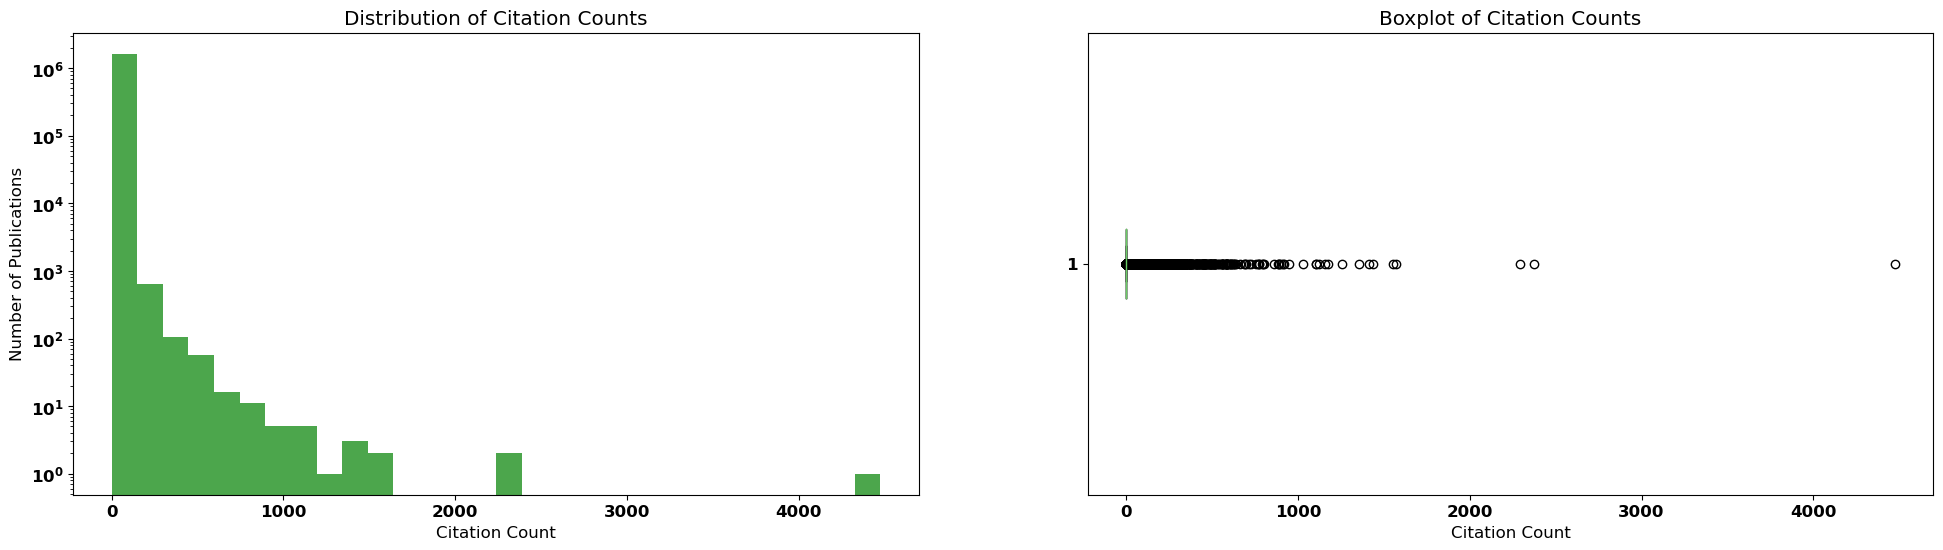

In [47]:

# Start a new figure
plt.figure(figsize=(24, 6))  # Increase the figure size to accommodate two subplots side by side

# 1st subplot for 'citation_count' (Histogram)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['citation_count'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Citation Counts')
plt.xlabel('Citation Count')
plt.ylabel('Number of Publications')
plt.yscale('log')  # Use logarithmic scale if data is skewed

# Second subplot for 'citation_count' (Boxplot)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.boxplot(df['citation_count'], vert=False)
plt.title('Boxplot of Citation Counts')
plt.xlabel('Citation Count')

# Show the figure with both subplots
plt.show()


<div style="background-color: #ffff00; color: black; padding: 10px;">
    Citiation distribution is highly skewed indicating influence or centralized network where few publications receive a very high number of citations, while the majority of publications are cited less frequently. This pattern is characteristic of scholarly impact, where a minority of works are highly influential.
</div>

#### 5.4.2 Citation Categories

In [48]:

# Define a function to categorize papers based on specific citation count thresholds
def categorize_citations(citation_count):
    if citation_count == 0:
        return 'Seldom Cited'
    elif 0 < citation_count <= 10:
        return 'Moderately Cited'
    elif 10 < citation_count <= 100:
        return 'Frequently Cited'
    else:
        return 'Highly Cited'

# Apply the function to create a new column 'citation_category'
df['citation_category'] = df['citation_count'].apply(categorize_citations)

# Group by 'citation_category' and calculate mean, median of citation counts
# and count the number of papers in each category
grouped = df.groupby('citation_category')['citation_count'].agg(['mean', 'median', 'count'])

# Print the grouped analysis
print(grouped)


                         mean  median    count
citation_category                             
Frequently Cited    24.673177    18.0    46080
Highly Cited       198.487493   146.0     1799
Moderately Cited     2.866635     2.0   290735
Seldom Cited         0.000000     0.0  1293828


<div style="background-color: #ffff00; color: black; padding: 10px;">

1. Seldom Cited: Most of the papers fall into this category with 1,117,839 papers having zero citations. This highlights a common phenomenon in academic publishing where a significant portion of the output is not cited.
2. Moderately Cited: This category includes papers that have been cited between 1 and 10 times. It contains 289,915 papers with an average of approximately 2.87 citations, and the median being 2. This shows that while these papers have garnered some attention, their impact is relatively limited.
3. Frequently Cited: Papers in this category, cited between 11 and 100 times, total 45,952. They have a mean citation count of about 24.68 and a median of 18. This indicates a higher level of academic influence or utility, with citations spreading more into the middle range.
4. Highly Cited: The smallest group consists of 1,794 papers, but these are the most influential, with a mean citation count of 198.57 and a median of 146. Papers in this category are likely key works in their fields, potentially seminal papers that have significantly influenced other research.

</div>

### 5.5 Year and Citations

#### 5.5.1 Year and Citations: By Thresholds

In [31]:
# Define the thresholds
thresholds = [5, 10, 20, 50]

# Initialize a dictionary to hold the data for each threshold
threshold_data = {f"More than {threshold}": [] for threshold in thresholds}

# Calculate the number of publications that exceed each threshold for each year
for threshold in thresholds:
    threshold_data[f"More than {threshold}"] = non_zero_year[non_zero_year['citation_count'] > threshold].groupby('year').size()

# Now convert this dictionary to a DataFrame
threshold_df = pd.DataFrame(threshold_data).fillna(0)

threshold_df

,More than 5,More than 10,More than 20,More than 50
year,,,,
1940,1,1.0,0.0,0.0
1945,1,1.0,1.0,1.0
1949,1,1.0,1.0,1.0
1954,2,0.0,0.0,0.0
1956,2,1.0,0.0,0.0
1957,2,1.0,0.0,0.0
1958,6,3.0,1.0,0.0
1959,15,5.0,3.0,1.0
1960,16,10.0,6.0,5.0


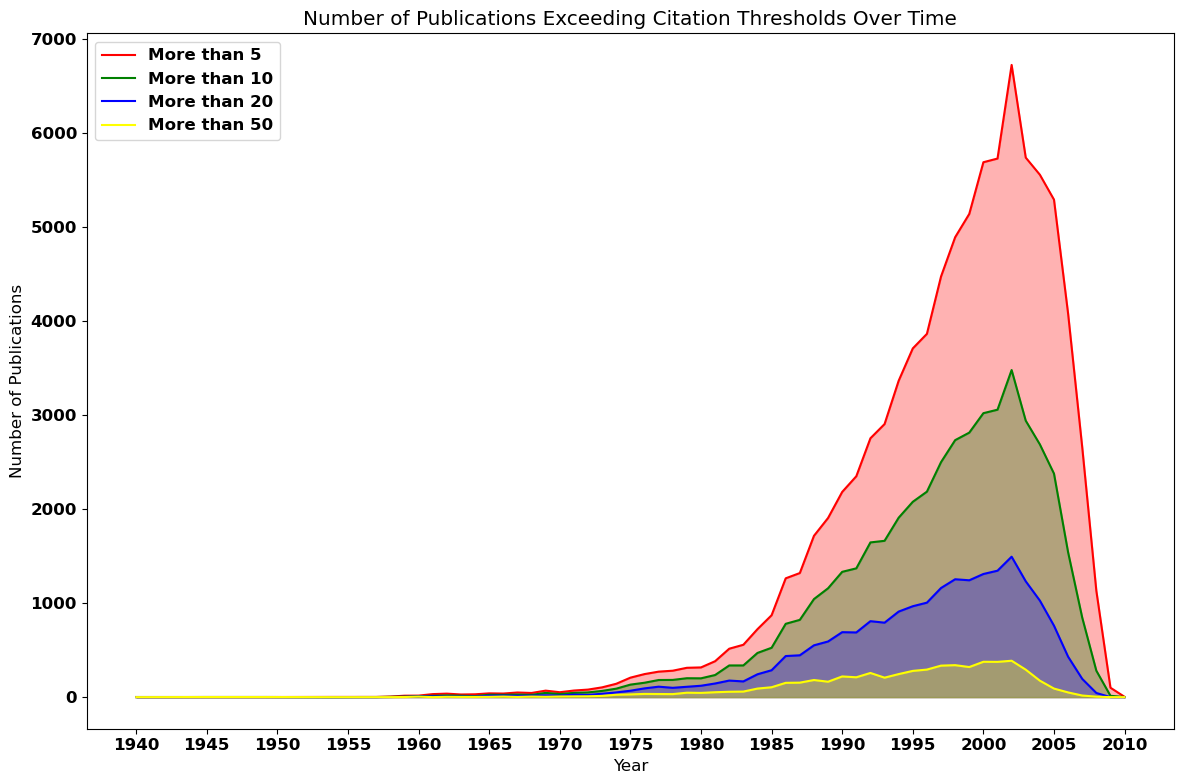

In [32]:
# Plotting
plt.figure(figsize=(12, 8))

# Color list for different thresholds
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']

for i, threshold in enumerate(thresholds):
    # Plot each threshold line with markers
    line = plt.plot(threshold_df.index, threshold_df[f"More than {threshold}"], label=f"More than {threshold}", color=colors[i])
    
    # Shading the area under each curve
    plt.fill_between(threshold_df.index, 0, threshold_df[f"More than {threshold}"], color=colors[i], alpha=0.3)

plt.title('Number of Publications Exceeding Citation Thresholds Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()

# Setting x-ticks to show every 5 years
plt.xticks(np.arange(min(threshold_df.index), max(threshold_df.index) + 1, 5))

plt.tight_layout()  # Adjust the layout
plt.show()


<div style="background-color: #ffff00; color: black; padding: 10px;">
    Highest dip from year 1990 to 1991 in number of publications.
</div>

#### 5.5.2 Year and Citations: Line Graph of Average Citations per Year

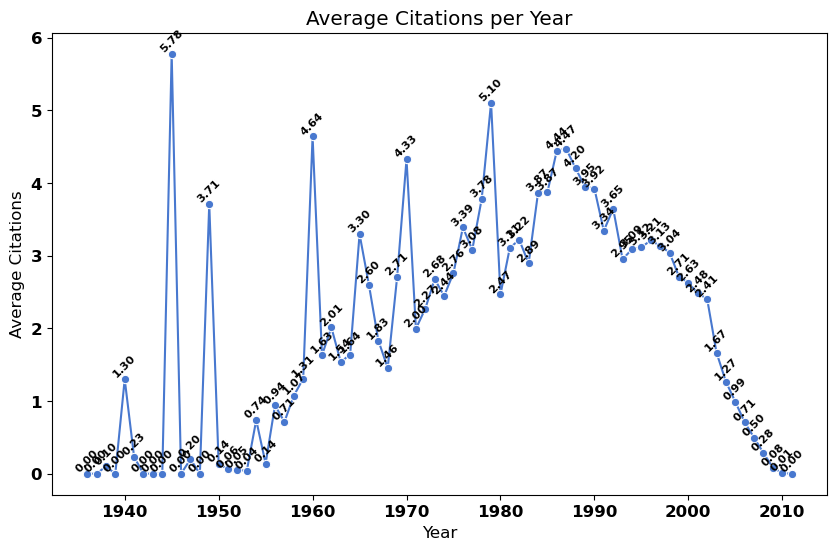

In [33]:
# Calculate the average citations per year
avg_citations_per_year = non_zero_year.groupby('year')['citation_count'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_citations_per_year.index, y=avg_citations_per_year.values, marker='o')
plt.title('Average Citations per Year')
plt.xlabel('Year')
plt.ylabel('Average Citations')

# Annotate each point with the average citation value
for x, y in zip(avg_citations_per_year.index, avg_citations_per_year.values):
    plt.text(x, y, f'{y:.2f}', color='black', ha='center', va='bottom', fontsize=8, rotation=45)

plt.show()

<div style="background-color: #ffff00; color: black; padding: 10px;">
    Older publications have higher number of citation counts.
</div>

#### 5.5.3 Year and Citations: Box Plots of Citations by Year

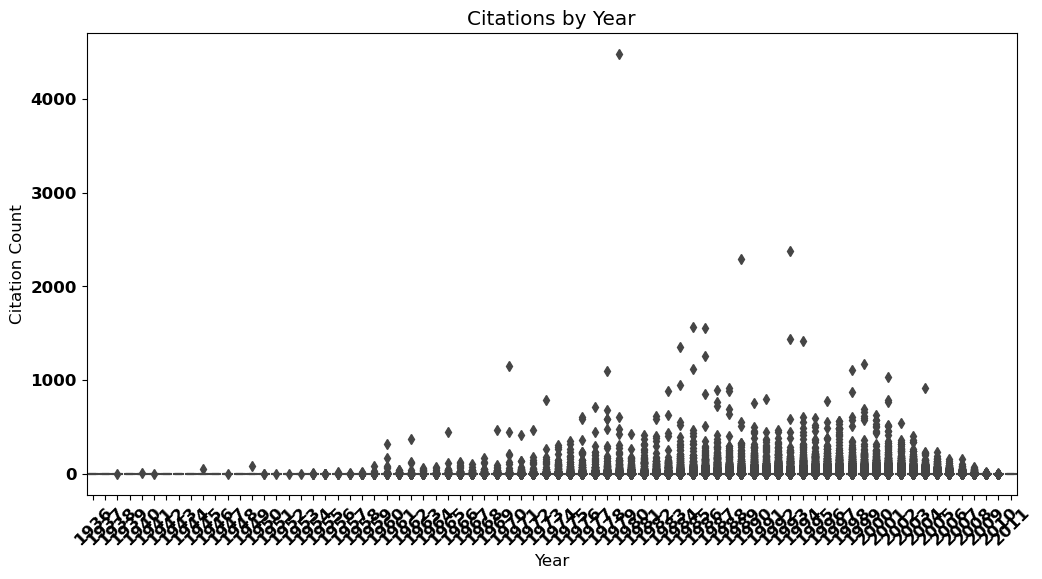

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='citation_count', data=non_zero_year)
plt.title('Citations by Year')
plt.xlabel('Year')
plt.ylabel('Citation Count')
plt.xticks(rotation=45)
plt.show()

### 5.6 Titles

#### 5.6.1 Bar Chart of Top 10 Most Cited Papers

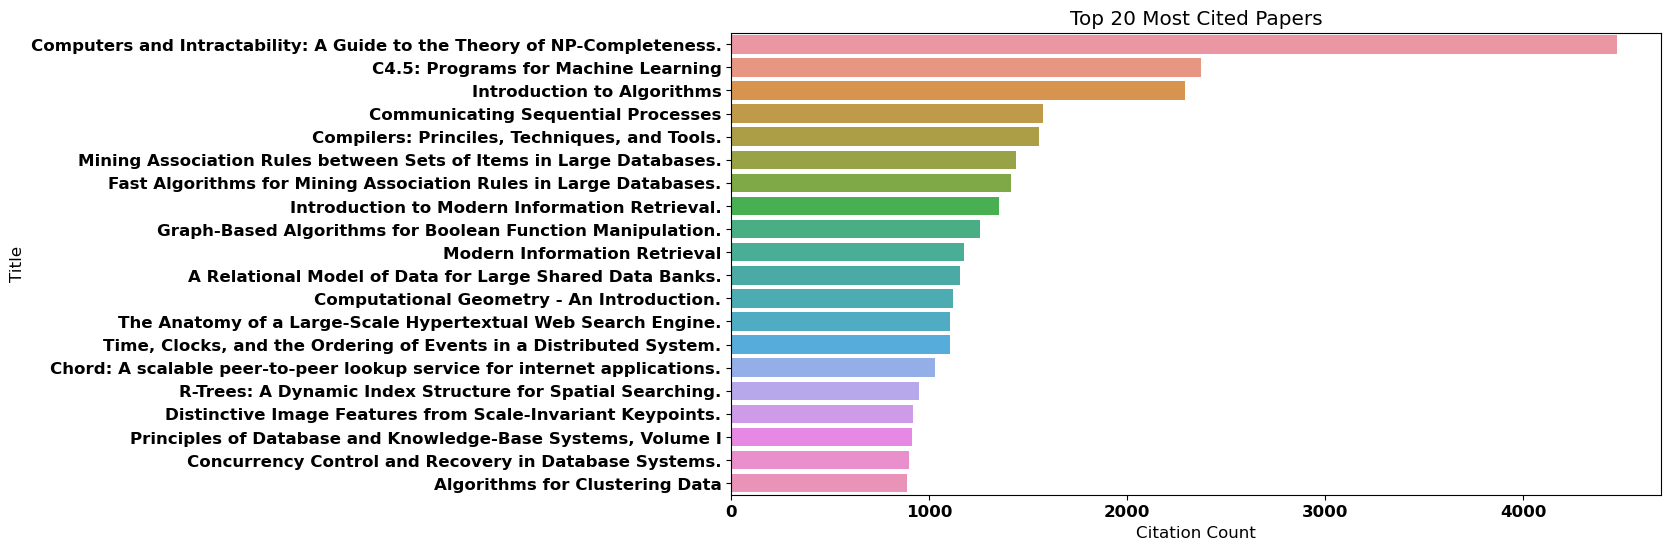

In [35]:
# Bar Chart of Top 10 Most Cited Papers
top_cited_papers = df.nlargest(20, 'citation_count')
plt.figure(figsize=(12, 6))
sns.barplot(x='citation_count', y='title', data=top_cited_papers)
plt.title('Top 20 Most Cited Papers')
plt.xlabel('Citation Count')
plt.ylabel('Title')
plt.show()

#### 5.6.1 Word Cloud of Most Common Words in Titles

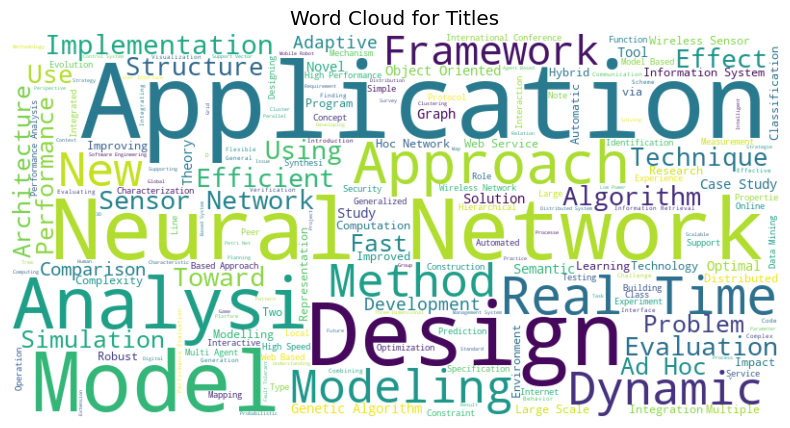

In [36]:
# Generating a word cloud for titles
title_words = ' '.join(df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles')
plt.show()

<div style="background-color: #ffff00; color: black; padding: 10px;">
    Most common words in top titles are related to data, highlighting that the dataset is related to data centric publications.
</div>

### 5.7 Venue

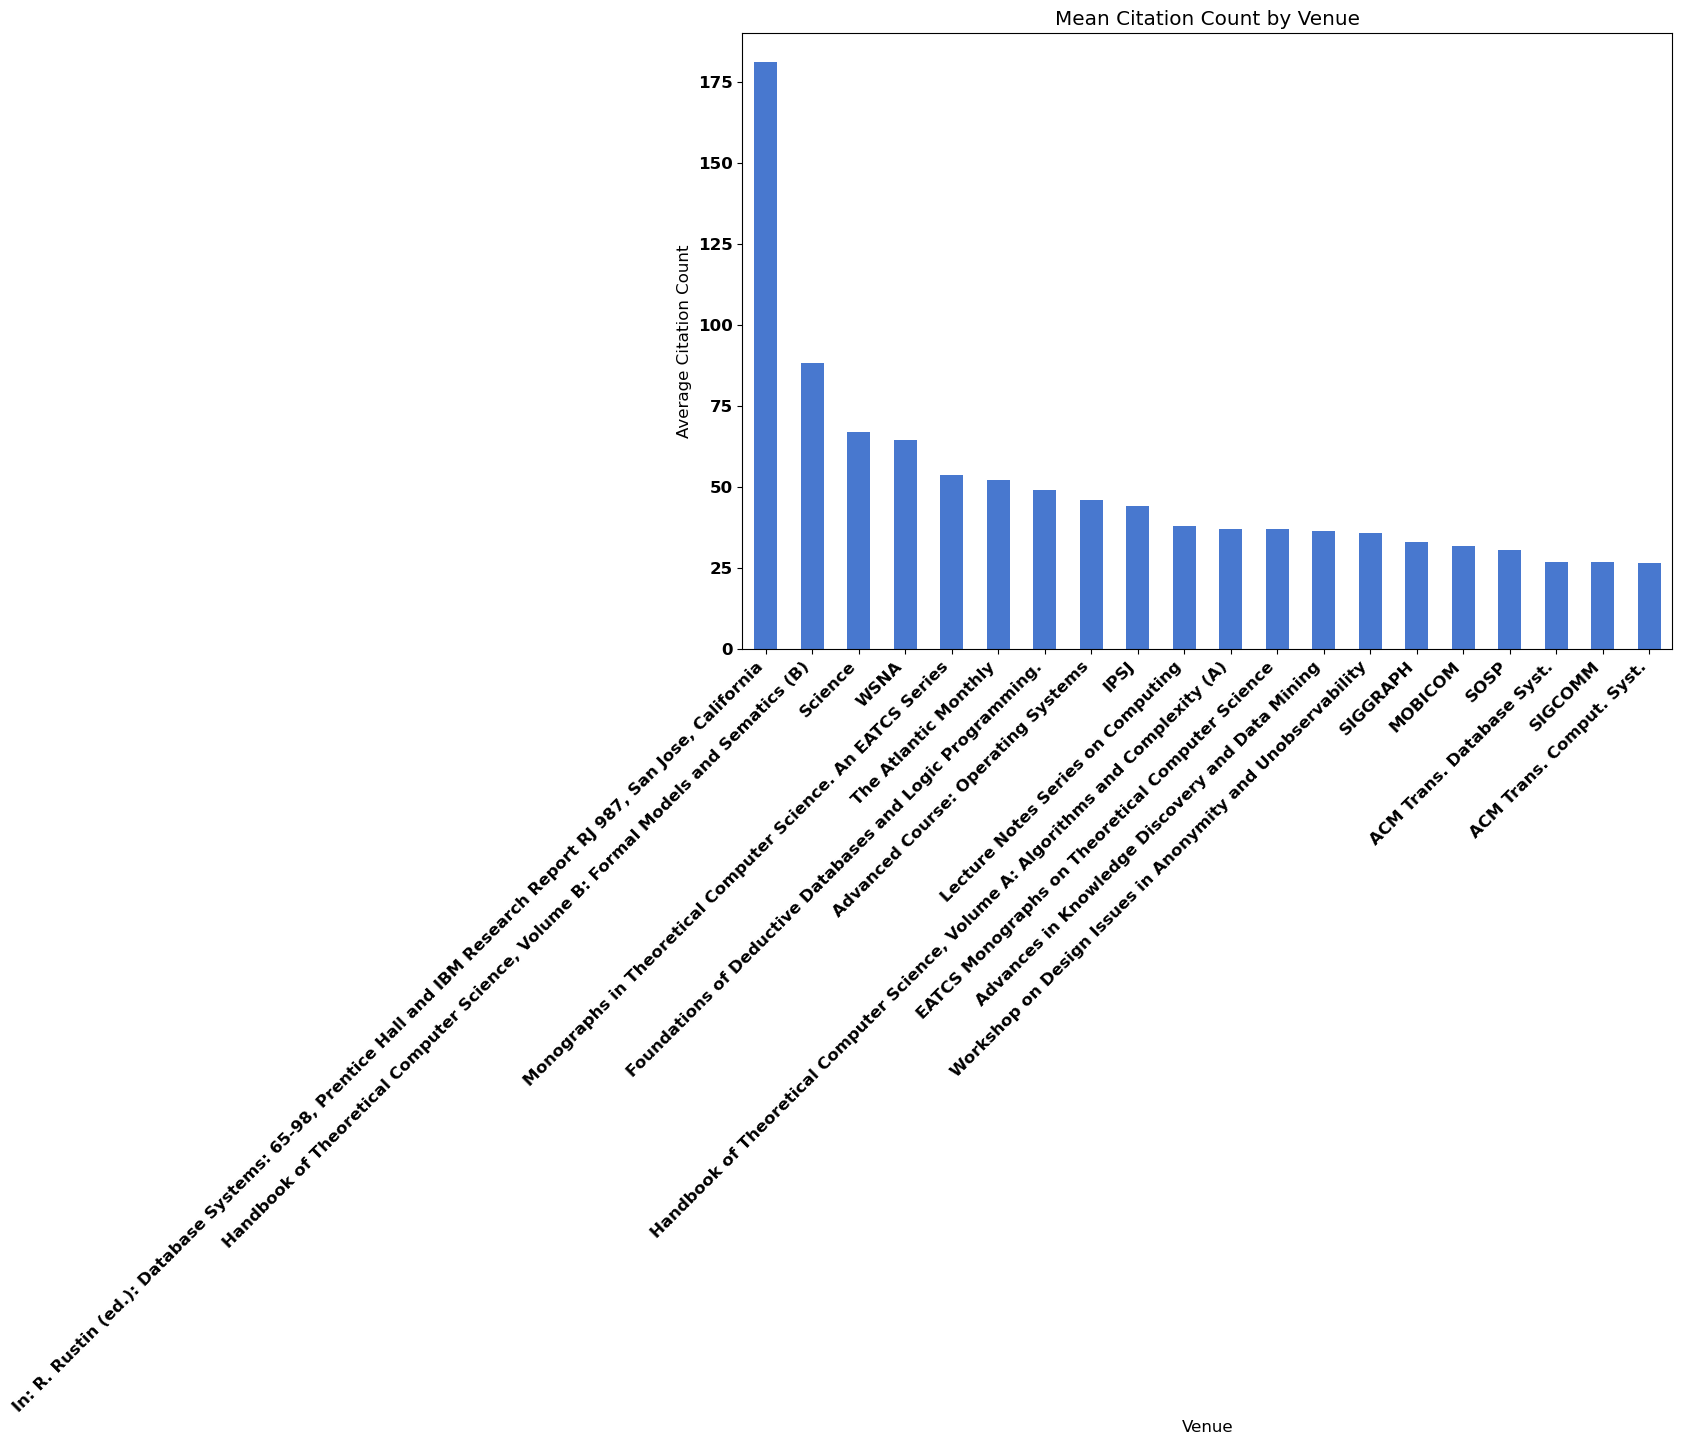

In [50]:

# Group data by 'venue' and calculate summary statistics for 'citation_count'
citation_stats_by_venue = df.groupby('venue')['citation_count'].agg(['mean', 'median', 'std', 'count'])

# Sort the results by the mean citation count to see which venues have the highest impact
sorted_citation_stats_by_venue = citation_stats_by_venue.sort_values(by='mean', ascending=False)

# Plot the mean citation counts for the top 20 venues
top_venues = sorted_citation_stats_by_venue.head(20)
plt.figure(figsize=(12, 8))
top_venues['mean'].plot(kind='bar')
plt.title('Mean Citation Count by Venue')
plt.xlabel('Venue')
plt.ylabel('Average Citation Count')
plt.xticks(rotation=45, ha='right')  # Rotate venue labels for better readability
plt.show()


<div style="background-color: #ffff00; color: black; padding: 10px;">
1. A leading venue stands out with a notably higher average citation count, indicating its prominence or the high impact of its publications.

2. While citation counts decrease across venues, multiple venues maintain a strong average, reflecting a spectrum of influence in the dataset.
</div>

### 5.8 References

In [37]:
df['references'].value_counts().sort_values(ascending=False)

[]                                                                                                                                                                                                                                                                                                                                                            1315880
['2358']                                                                                                                                                                                                                                                                                                                                                          240
['597946']                                                                                                                                                                                                                                                                                  

In [38]:
# How many rows have references as ''
no_references = df[df['references'] == '']
print("Number of rows where references is '':", no_references.shape[0])

Number of rows where references is '': 0


#### 5.8.1 Add a column 'num_references;

In [39]:
non_zero_year['num_references'] = non_zero_year['references'].apply(len)

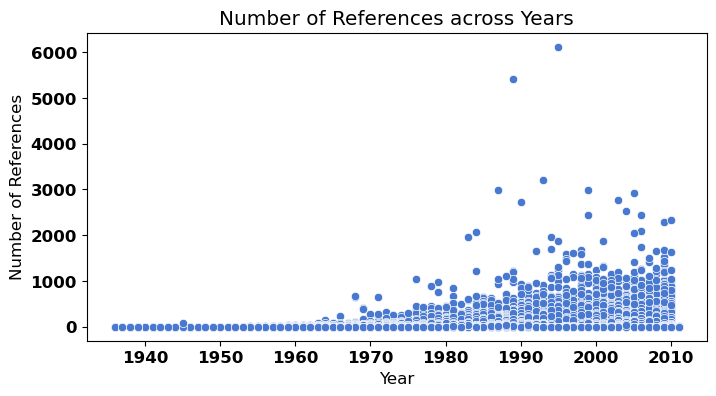

In [40]:
# Scatter plot of citation count vs number of authors
plt.figure(figsize=(8, 4))
sns.scatterplot(x='year', y='num_references', data=non_zero_year)
plt.title('Number of References across Years')
plt.xlabel('Year')
plt.ylabel('Number of References')
plt.show()

<div style="background-color: #ffff00; color: black; padding: 10px;">
    Most references are from later years.
</div>

#### 5.8.2 References for specific authors

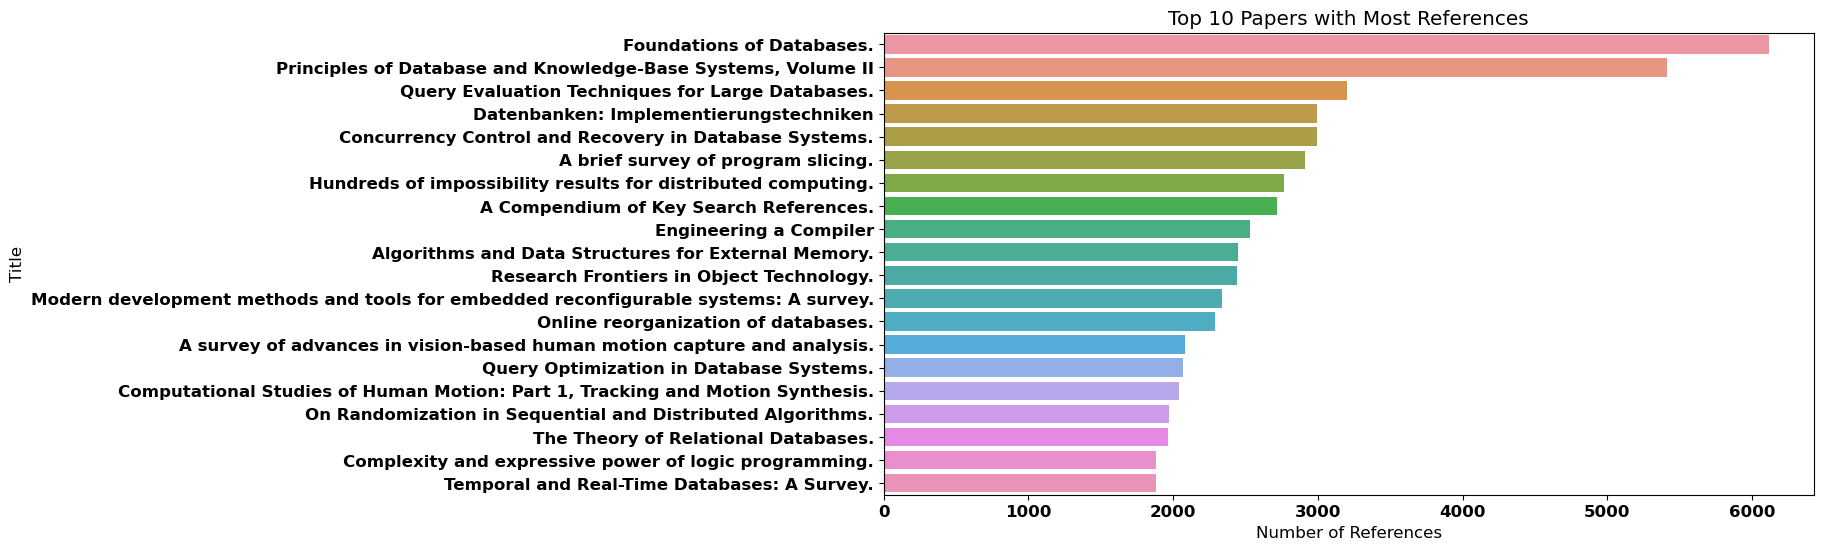

In [41]:
most_references = non_zero_year.nlargest(20, 'num_references')
plt.figure(figsize=(12, 6))
sns.barplot(x='num_references', y='title', data=most_references)
plt.title('Top 10 Papers with Most References')
plt.xlabel('Number of References')
plt.ylabel('Title')
plt.show()

#### 5.8.3 Word Cloud of Titles with Most References

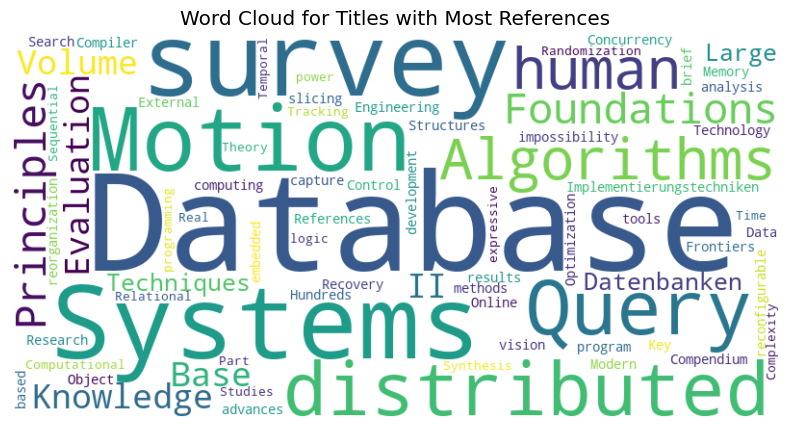

In [42]:
most_references_words = ' '.join(most_references['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(most_references_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles with Most References')
plt.show()

<div style="background-color: #ffff00; color: black; padding: 10px;">
    Most cited titles belong to data and alogorthm related terms. 
</div>

## 5.9 Add a column 'num_authors'

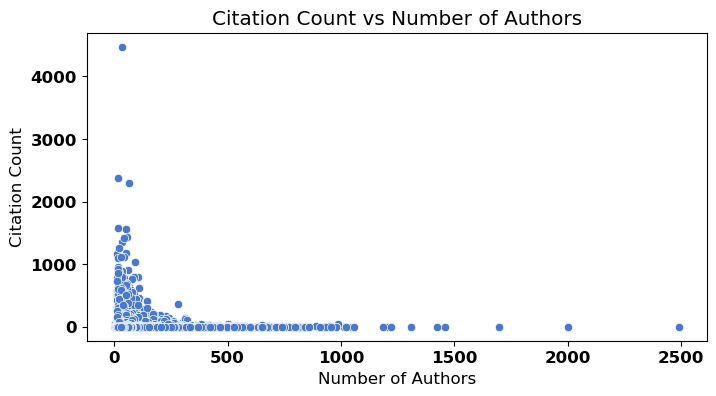

In [43]:
# Adding a new column for number of authors
df['num_authors'] = df['authors'].apply(len)

# Scatter plot of citation count vs number of authors
plt.figure(figsize=(8, 4))
sns.scatterplot(x='num_authors', y='citation_count', data=df)
plt.title('Citation Count vs Number of Authors')
plt.xlabel('Number of Authors')
plt.ylabel('Citation Count')
plt.show()

<div style="background-color: #ffff00; color: black; padding: 10px;">
    Publications with less number of authors have more citations.
</div>

## 5.10 Abstract

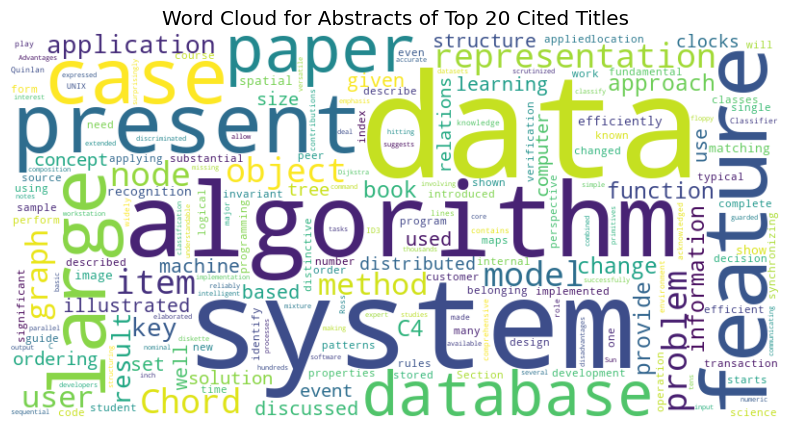

In [44]:
# Get the top 20 titles by citation_count
top_20_abstracts = df.nlargest(20, 'citation_count')['abstract']

# Remove any missing values in abstracts
top_20_abstracts = top_20_abstracts.dropna()

# Join the abstracts into a single string
abstract_text = ' '.join(top_20_abstracts)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(abstract_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Abstracts of Top 20 Cited Titles')
plt.show()

<div style="background-color: #ffff00; color: black; padding: 10px;">
    Most cited titles belong to data and alogorthm related terms. 
</div>

## 5.11 Pair plots

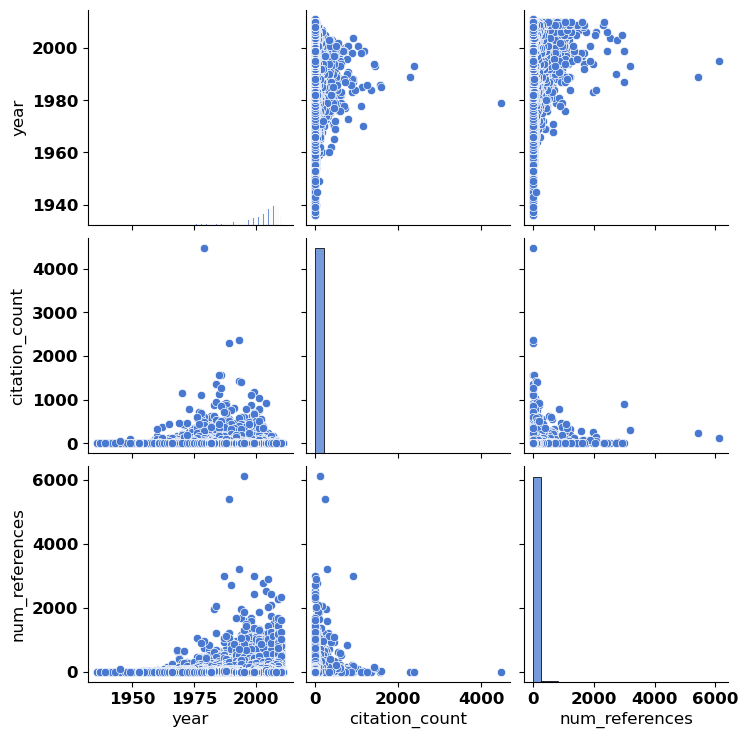

In [45]:
sns.pairplot(non_zero_year)
plt.show()

## 5.12 Correlation analysis

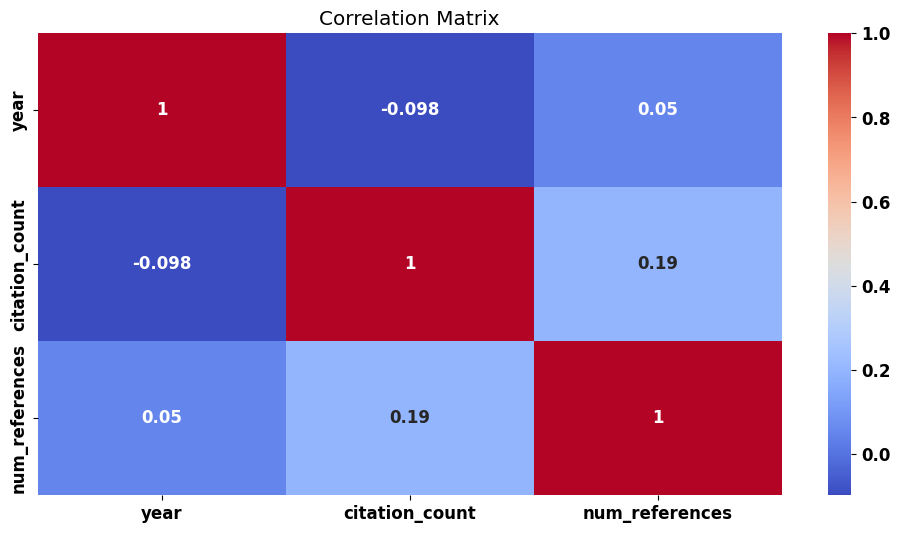

In [90]:
# Correlation matrix

# Consider only numerical columns
numerical_cols = non_zero_year.select_dtypes(include=[np.number])

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 6. "Exploding" the lists into separate rows or unpivoting the data
To properly analyze the "authors" column where each cell contains a list of authors, we need to expand these lists into individual rows. 

In [91]:
# Assume the 'authors' column contains lists represented as strings, convert them into actual lists
import ast  # Import ast module to safely evaluate string literals as Python expressions
non_zero_year['authors'] = non_zero_year['authors'].apply(ast.literal_eval)

In [92]:
# Explode the 'authors' list so that each author gets their own row, keeping other column data intact
df_exploded = non_zero_year.explode('authors')

In [93]:
# Shape, info, and head of the data
print(f"Shape: {df_exploded.shape}")
print(f"Info: {df_exploded.info()}")
df_exploded.head()

Shape: (3837205, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 3837205 entries, 0 to 1632441
Data columns (total 8 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   title           object
 1   authors         object
 2   year            int64 
 3   venue           object
 4   references      object
 5   abstract        object
 6   citation_count  int64 
 7   num_references  int64 
dtypes: int64(3), object(5)
memory usage: 263.5+ MB
Info: None


,title,authors,year,venue,references,abstract,citation_count,num_references
0,OQL[C++]: Extending C++ with an Object Query C...,José A. Blakeley,1995,Modern Database Systems,[],NaN,5,2
1,Transaction Management in Multidatabase Systems.,Yuri Breitbart,1995,Modern Database Systems,[],NaN,0,2
1,Transaction Management in Multidatabase Systems.,Hector Garcia-Molina,1995,Modern Database Systems,[],NaN,0,2
1,Transaction Management in Multidatabase Systems.,Abraham Silberschatz,1995,Modern Database Systems,[],NaN,0,2
2,Overview of the ADDS System.,Yuri Breitbart,1995,Modern Database Systems,[],NaN,0,2


In [94]:
# Now calculate unique authors
unique_authors = df_exploded['authors'].nunique()
print(f"There are {unique_authors} unique authors in the dataset.")

There are 858771 unique authors in the dataset.
